In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv('BIKE.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

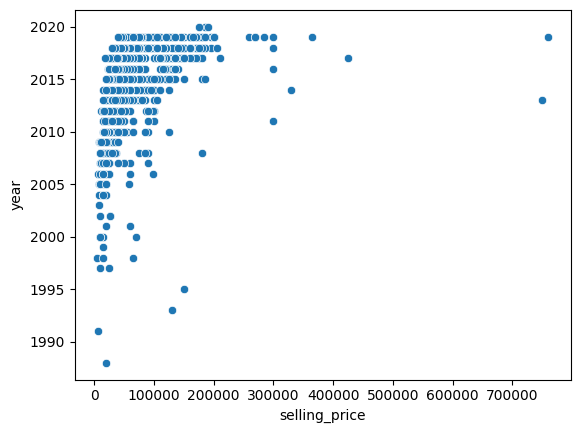

In [ ]:
#1. Scatter plot
plt.figure()
sns.scatterplot(data=df,x="selling_price",y="year")
plt.show()

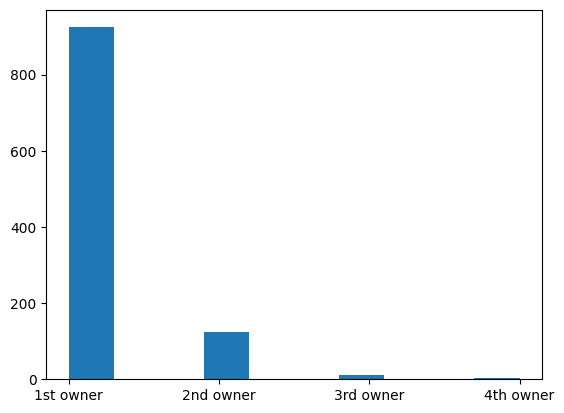

In [ ]:
#2. Histogram

plt.hist(df['owner'])
plt.show()

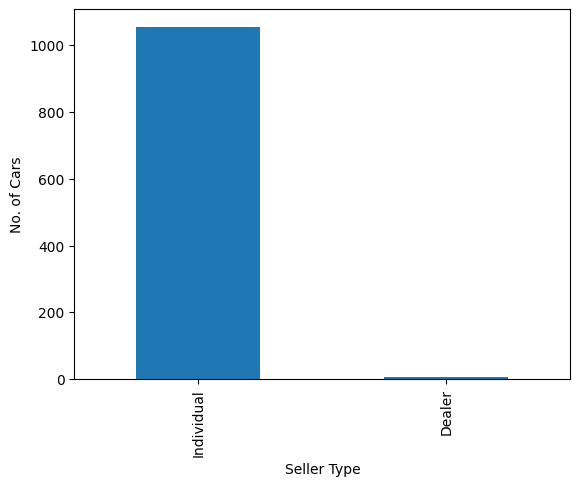

In [ ]:
#3. Bar Plot
df['seller_type'].value_counts().plot(kind='bar')
plt.xlabel('Seller Type')
plt.ylabel('No. of Cars')
plt.show()

In [ ]:
df.dropna()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df['ex_showroom_price'].dtype

dtype('float64')

In [ ]:
df['selling_price'].dtype

dtype('int64')

In [ ]:
df['selling_price']=df['selling_price'].astype('float')
df['selling_price'].dtype

dtype('float64')

In [ ]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(),inplace=True)

In [ ]:
df['ex_showroom_price'].unique()

array([  87958.71405751,  148114.        ,   89643.        ,
         53857.        ,   87719.        ,   60122.        ,
         78712.        ,   47255.        ,   95955.        ,
        351680.        ,   58314.        ,  117926.        ,
        132680.        ,   44389.        ,   53900.        ,
         56147.        ,   84751.        ,   61600.        ,
         79432.        ,   78350.        ,   71049.        ,
         57557.        ,  202310.        ,   71150.        ,
         56750.        ,   84042.        ,   69750.        ,
         59844.        ,   42859.        ,   73413.        ,
         49900.        ,   59422.        ,   57549.        ,
         51994.        ,   80350.        ,   54605.        ,
         88161.        ,   78513.        ,   50098.        ,
        195500.        ,   92074.        ,  164004.        ,
         74295.        ,   49642.        ,   51112.        ,
         53751.        ,   50267.        ,   61653.        ,
         70851.        ,

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y.head()

0     87958.714058
1     87958.714058
2    148114.000000
3     89643.000000
4     87958.714058
Name: ex_showroom_price, dtype: float64

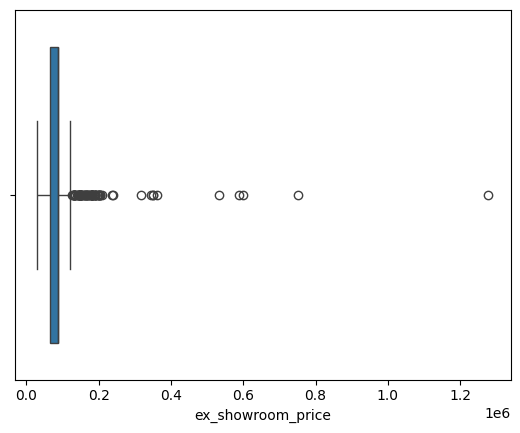

In [ ]:
sns.boxplot(data=x,x=y)
plt.show()

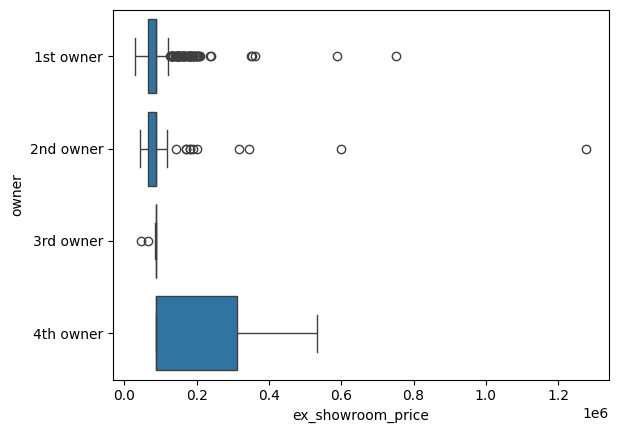

In [ ]:
sns.boxplot(data=x,x=y,y='owner')
plt.show()

In [ ]:
x[(x.owner=='2nd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000
7,Royal Enfield Bullet 350 [2007-2011],180000.0,2008,Individual,2nd owner,39000
11,Honda Navi,28000.0,2016,Individual,2nd owner,10000
17,Yamaha YZF R15 S,40000.0,2010,Individual,2nd owner,45000
22,Honda Activa i,32000.0,2013,Individual,2nd owner,20696
...,...,...,...,...,...,...
1044,Bajaj Pulsar 150,25000.0,2010,Individual,2nd owner,26000
1051,Bajaj Discover 125,20000.0,2014,Individual,2nd owner,25000
1052,Hero Hunk,20000.0,2009,Individual,2nd owner,49000
1053,Hero Ignitor Disc,20000.0,2015,Individual,2nd owner,24000


In [ ]:
x[(x.owner=='3rd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
28,Yamaha Fazer [2009-2016],40000.0,2013,Individual,3rd owner,35000
39,Royal Enfield Thunderbird 350,90000.0,2015,Individual,3rd owner,13000
202,Bajaj Pulsar 135 LS,56000.0,2017,Individual,3rd owner,37714
306,Yamaha Rx,70000.0,2000,Individual,3rd owner,5000
428,Hero Honda Karizma ZMR [2010],45000.0,2012,Individual,3rd owner,44000
457,Mahindra Flyte,22000.0,2009,Individual,3rd owner,20000
554,Yamaha RX135,65000.0,1998,Individual,3rd owner,16500
667,Hero Passion Pro 110,20000.0,2008,Individual,3rd owner,40000
796,Hero Honda CD Deluxe,25000.0,2008,Individual,3rd owner,65000
868,Royal Enfield Bullet 350 [2007-2011],150000.0,1995,Individual,3rd owner,20000


Linear Regression

In [ ]:
x=df['year']
y=df['selling_price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
lr.intercept_

-11052544.176615192

In [ ]:
lr.coef_

array([5518.25077929])

In [ ]:
y_pred = lr.predict(np.array(x_train).reshape(-1,1))
y_pred

array([ 39139.88976727,  72249.39444304,  83285.89600163,  83285.89600163,
        83285.89600163,  61212.89288445,  39139.88976727,  44658.14054657,
        33621.63898798,  88804.14678092,  88804.14678092, -27079.11958427,
        61212.89288445,  66731.14366374,  83285.89600163,  77767.64522233,
        55694.64210515,  50176.39132586,  77767.64522233,  28103.38820868,
        72249.39444304,  66731.14366374,  61212.89288445,  66731.14366374,
        61212.89288445,  77767.64522233,  61212.89288445,  61212.89288445,
       -21560.86880497,  72249.39444304,  -5006.11646709,  33621.63898798,
        50176.39132586,  61212.89288445,  83285.89600163,  22585.13742939,
        50176.39132586,  55694.64210515,  83285.89600163,  72249.39444304,
        55694.64210515,  61212.89288445,  50176.39132586,  50176.39132586,
        72249.39444304,  83285.89600163,  77767.64522233,  88804.14678092,
        83285.89600163,  55694.64210515,  39139.88976727,  44658.14054657,
        55694.64210515,  

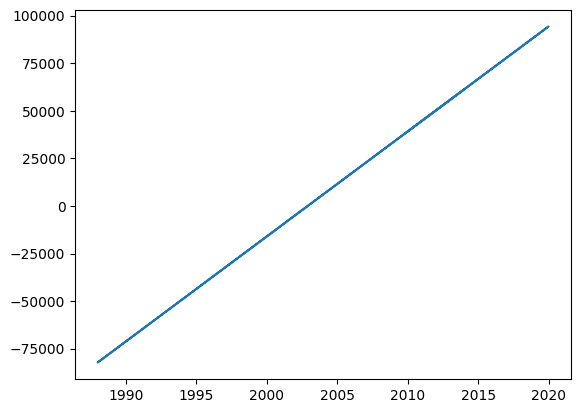

In [ ]:
plt.figure()
plt.plot(x_train,y_pred)
plt.show()

In [ ]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([ 66731.14366374,  39139.88976727,  33621.63898798,  61212.89288445,
        77767.64522233,  72249.39444304,  66731.14366374,  61212.89288445,
        55694.64210515,  66731.14366374,  55694.64210515,  77767.64522233,
        33621.63898798,  28103.38820868,  88804.14678092,  72249.39444304,
        44658.14054657,  77767.64522233,  77767.64522233,  88804.14678092,
        22585.13742939,  50176.39132586,  55694.64210515,  72249.39444304,
        77767.64522233,  44658.14054657,  39139.88976727,  22585.13742939,
        61212.89288445,  77767.64522233,  83285.89600163,  11548.6358708 ,
        72249.39444304,  28103.38820868,  77767.64522233,  83285.89600163,
        77767.64522233,  77767.64522233,  83285.89600163,  83285.89600163,
        83285.89600163,  72249.39444304, -16042.61802568,  50176.39132586,
        33621.63898798,  88804.14678092,  66731.14366374,  33621.63898798,
        77767.64522233,  44658.14054657,  66731.14366374,  39139.88976727,
        77767.64522233,  

In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(rmse)
print(mae)

1693927242.7194211
41157.347372242315
27848.499991090062


In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.20309655002764893